In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('adult.data',header=None)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
df_train.columns=col_labels

In [6]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_train.shape

(32561, 15)

In [8]:
df_test=pd.read_csv('test.test',skiprows=1,header=None)

In [9]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
df_test.columns=col_labels

In [11]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
df_train['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
df_train['wage_class']=df_train['wage_class'].map({' <=50K':0,' >50K':1})

In [14]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<AxesSubplot:>

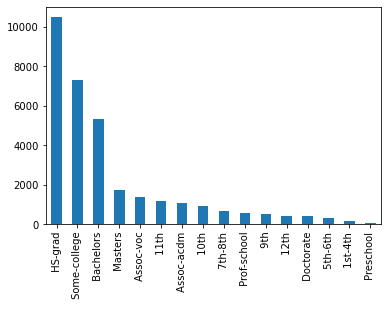

In [15]:
df_train['education'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Salary based on Education')

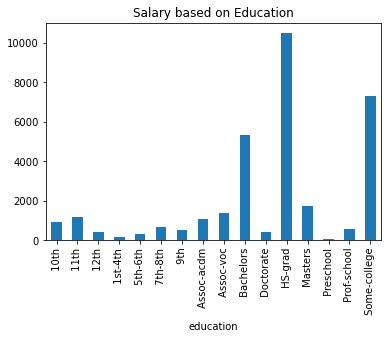

In [16]:
df_train.groupby(['education'])['wage_class'].count().plot(kind='bar')
plt.title('Salary based on Education')

Text(0.5, 1.0, 'Number of Occupation based on Salary')

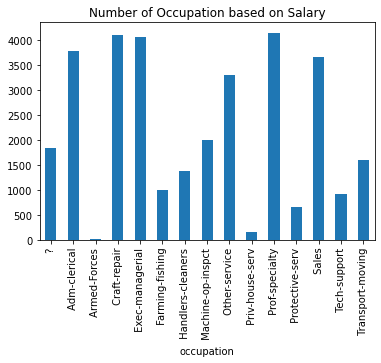

In [17]:
df_train.groupby(['occupation'])['wage_class'].count().plot(kind='bar')
plt.title('Number of Occupation based on Salary')

<AxesSubplot:xlabel='education', ylabel='hours_per_week'>

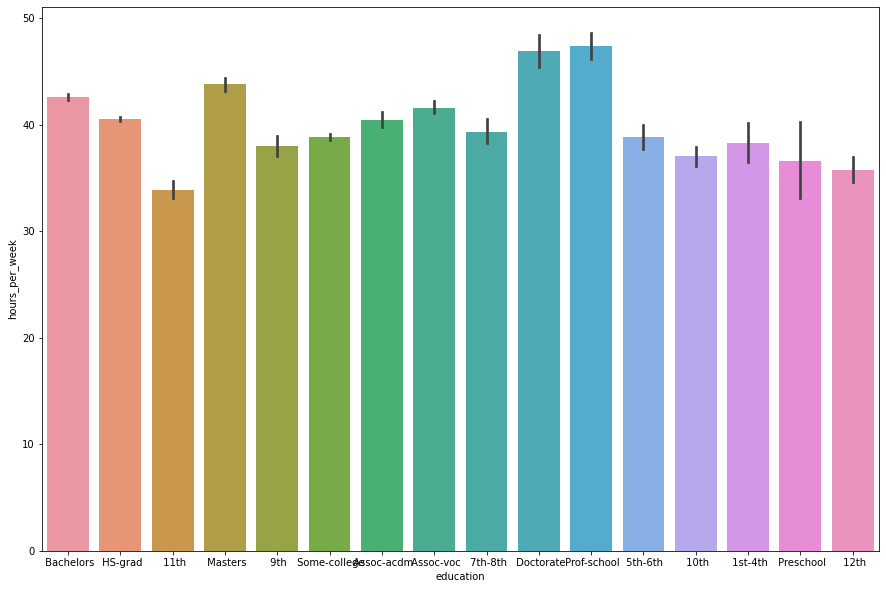

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x='education',y='hours_per_week',data=df_train)

<AxesSubplot:xlabel='education', ylabel='hours_per_week'>

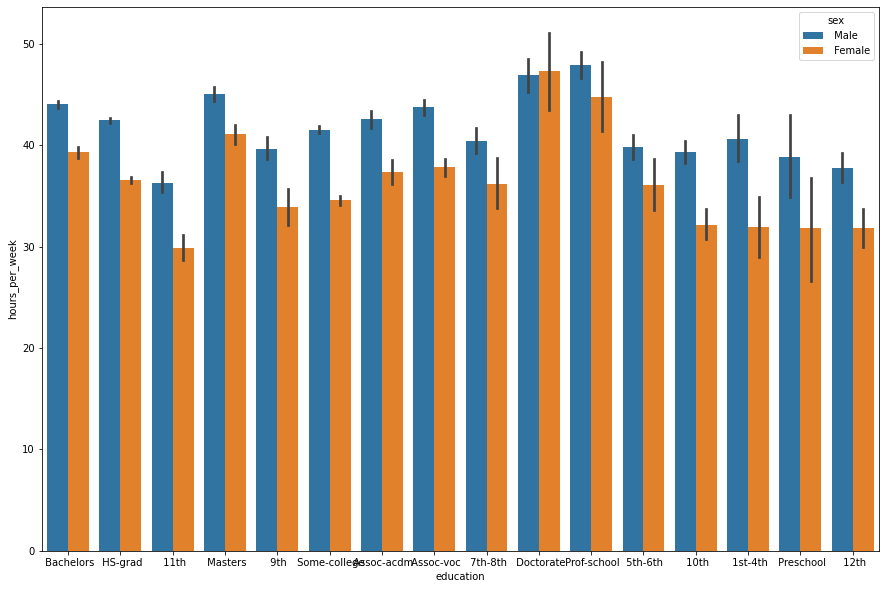

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x='education',y='hours_per_week',hue='sex',data=df_train)

<AxesSubplot:xlabel='education', ylabel='hours_per_week'>

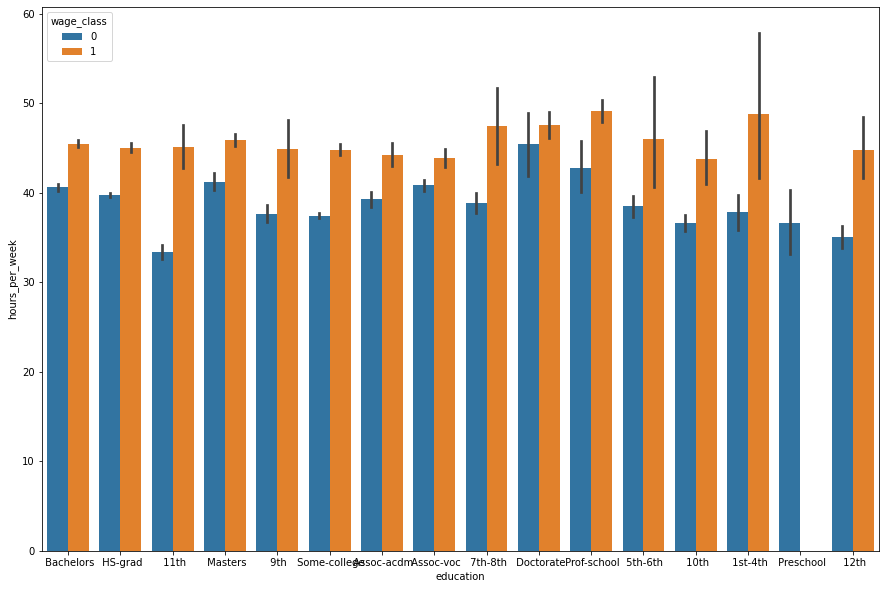

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='education',y='hours_per_week',hue='wage_class',data=df_train)

<AxesSubplot:>

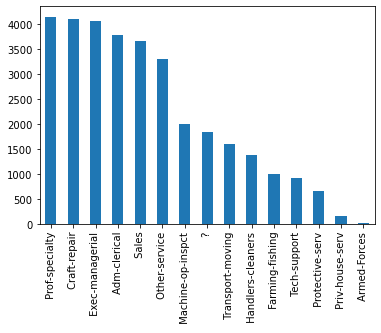

In [21]:
df_train['occupation'].value_counts().plot(kind='bar')

In [22]:
df_train['native_country'].replace(' ?','Others',inplace=True)

In [23]:
df_train['native_country'].value_counts().head(10)

 United-States    29170
 Mexico             643
Others              583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
Name: native_country, dtype: int64

In [24]:
top_10=[x for x in df_train['native_country'].value_counts().head(10).index]

In [25]:
top_10

[' United-States',
 ' Mexico',
 'Others',
 ' Philippines',
 ' Germany',
 ' Canada',
 ' Puerto-Rico',
 ' El-Salvador',
 ' India',
 ' Cuba']

In [26]:
for label in top_10:
    df_train[label]=np.where(df_train['native_country']==label,1,0)

In [27]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,United-States,Mexico,Others,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,0,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.shape

(32561, 25)

In [29]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
 United-States    0
 Mexico           0
Others            0
 Philippines      0
 Germany          0
 Canada           0
 Puerto-Rico      0
 El-Salvador      0
 India            0
 Cuba             0
dtype: int64

In [30]:
df_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [31]:
df_train['workclass'].replace(' ?','None',inplace=True)

In [32]:
df_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'None', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [33]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [34]:
df_train['education']=df_train['education'].map({' Bachelors':9,
                           ' HS-grad':5,
                           ' 11th':6,
                           ' Masters':9,
                           ' 9th':4,
                           ' Some-college':0,
                           ' Assoc-acdm':8,
                           ' Assoc-voc':8,
                           ' 7th-8th':3,
                           ' Doctorate':10,
                           ' Prof-school':8,
                           ' 5th-6th':2,
                           ' 10th':5,
                           ' 1st-4th':1,
                           ' Preschool':0,
                           ' 12th':7
    
})

In [35]:
df_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [36]:
df_train['occupation'].replace(' ?','None',inplace=True)

In [37]:
df_train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
None                  1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [38]:
occ=pd.get_dummies(df_train['occupation'],drop_first=True)

In [39]:
df_train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [40]:
reation=pd.get_dummies(df_train['relationship'],drop_first=True)

In [41]:
df_train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [42]:
race=pd.get_dummies(df_train['race'],drop_first=True)

In [43]:
sex=pd.get_dummies(df_train['sex'],drop_first=True)

In [44]:
married=pd.get_dummies(df_train['marital_status'],drop_first=True)

In [45]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,United-States,Mexico,Others,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba
0,39,State-gov,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
2,38,Private,215646,5,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
3,53,Private,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,0,0,0,0,0,0,0,0,0
4,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df_train.drop(['fnlwgt','marital_status','occupation','relationship','race','sex','native_country'],axis=1,inplace=True)

In [47]:
df_train.head()

,age,workclass,education,education_num,capital_gain,capital_loss,hours_per_week,wage_class,United-States,Mexico,Others,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba
0,39,State-gov,9,13,2174,0,40,0,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,9,13,0,0,13,0,1,0,0,0,0,0,0,0,0,0
2,38,Private,5,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0
3,53,Private,6,7,0,0,40,0,1,0,0,0,0,0,0,0,0,0
4,28,Private,9,13,0,0,40,0,0,0,0,0,0,0,0,0,0,1


In [48]:
df_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'None', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [49]:
married=pd.get_dummies(df_train['workclass'],drop_first=True)

In [50]:
df_train=pd.concat([df_train,married],axis=1)

In [51]:
df_train.drop(['workclass'],axis=1,inplace=True)

In [52]:
df_train.head()

,age,education,education_num,capital_gain,capital_loss,hours_per_week,wage_class,United-States,Mexico,Others,...,India,Cuba,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,None
0,39,9,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,5,9,0,0,40,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,53,6,7,0,0,40,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,28,9,13,0,0,40,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [53]:
df_train.drop(['education_num'],axis=1,inplace=True)

In [54]:
df_train

,age,education,capital_gain,capital_loss,hours_per_week,wage_class,United-States,Mexico,Others,Philippines,...,India,Cuba,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,None
0,39,9,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,5,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,53,6,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,28,9,0,0,40,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,8,0,0,38,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32557,40,5,0,0,40,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32558,58,5,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32559,22,5,0,0,20,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
X=df_train.drop(['wage_class'],axis=1)
y=df_train['wage_class']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [70]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [71]:
from xgboost import XGBClassifier

In [72]:
model=XGBClassifier()

In [73]:
model.fit(X_train,y_train)

C:\Users\vhshe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
model.score(X_train,y_train)

0.8599892506142506

In [75]:
model.score(X_test,y_test)

0.8331030247197911

In [78]:
pred=model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test,pred)

array([[4631,  244],
       [ 843,  795]], dtype=int64)

In [80]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_test6 = {'learning_rate':[1,0.5,0.1,0.01,0.001],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
               'n_estimators':[10,50,100,200],
               'max_depth': [3,5,10,20],
               'gamma':[0.1,0.2,0.3]
}

In [107]:
grid= GridSearchCV(model, param_grid = param_test6, scoring='roc_auc',n_jobs=-1, cv=5,verbose=3)

In [108]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 54.0min finished
C:\Users\vhshe\anaconda3\lib\site-pa

[20:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [111]:
grid.best_params_

{'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'reg_alpha': 0.01}

In [112]:
pred=grid.predict(X_test)

In [113]:
confusion_matrix(y_test,pred)

array([[4666,  209],
       [ 883,  755]], dtype=int64)

In [144]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve,f1_score

In [145]:
roc_curve(y_test,pred)

(array([0.        , 0.04287179, 1.        ]),
 array([0.        , 0.46092796, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [146]:
roc_auc_score(y_test,pred)

0.709028083028083

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [148]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [149]:
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

In [151]:
# calculate scores
lr_f1, lr_auc = f1_score(y_test, pred), auc(lr_recall, lr_precision)

Model: f1=0.580 auc=0.647


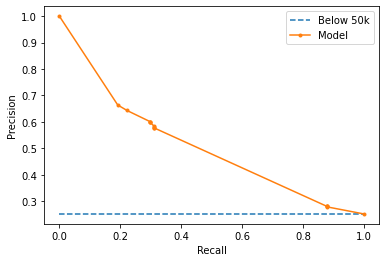

In [160]:
from matplotlib import pyplot
# summarize scores
print('Model: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Below 50k')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Model')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Below 50k: ROC AUC=0.500
Model: ROC AUC=0.647


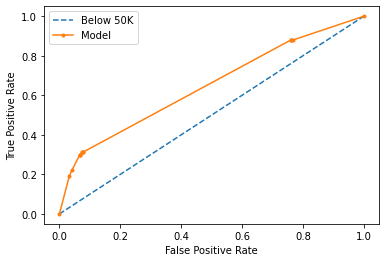

In [162]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Below 50k: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Below 50K')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()